<a href="https://colab.research.google.com/github/iamsauravsharma/insincere-question-classification/blob/bishal/lemization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bishalgaire360","key":"69b39489849cd899eaa93339bad30cdb"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c quora-insincere-questions-classification
from zipfile import ZipFile
file_name="train.csv.zip"
#file_name="embeddings.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')
file_name="embeddings.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
df=pd.read_csv('train.csv')
from tqdm import tqdm_notebook
import numpy as np
emb_file = "glove.840B.300d/glove.840B.300d.txt"
#emb_file ="GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin"
glove_dic = {}
for line in tqdm_notebook(open(emb_file)):
    temp = line.split(" ")
    glove_dic[temp[0]] = np.asarray(temp[1:],dtype='float32')

del df['qid']



 75% 41.0M/54.4M [00:00<00:00, 33.9MB/s]
100% 54.4M/54.4M [00:00<00:00, 65.8MB/s]
100% 5.95G/5.96G [00:50<00:00, 128MB/s]
100% 5.96G/5.96G [00:50<00:00, 126MB/s]
  0% 0.00/4.08M [00:00<?, ?B/s]
100% 4.08M/4.08M [00:00<00:00, 37.5MB/s]
 57% 9.00M/15.7M [00:00<00:00, 24.4MB/s]
100% 15.7M/15.7M [00:00<00:00, 35.4MB/s]
Done
Done


In [16]:
#df=pd.read_csv('train.csv')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#from nltk.corpus import stopwords
#stop = stopwords.words('english')
#df["question_text"] = df["question_text"].apply(lambda x:' '.join(x for x in x.split() if not x in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [0]:
sentences = df["question_text"].progress_apply(lambda x: x.split()).values
vocab = build_vocab(sentences)

100%|██████████| 1306122/1306122 [00:03<00:00, 365722.15it/s]


In [0]:
import operator 

def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:

            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x

In [0]:
#oov = check_coverage(vocab,glove_dic)
del df['qid']

In [0]:
len(vocab)

298080

In [17]:
def clean_text(x):

    x = str(x)
    #for punct in "/-'":
     #   x = x.replace(punct, ' ')
    #for punct in '&':
     #   x = x.replace(punct, f' {punct} ')
    for punct in '?!.,"#$%\'()+-/:;<=>@[\\]^_`{|}~' + '“”’':
    #for punct in '?':
        x = x.replace(punct, '')
    return x
df["question_text"] = df["question_text"].progress_apply(lambda x: clean_text(x))

100%|██████████| 1306122/1306122 [00:11<00:00, 111002.97it/s]


In [0]:
len(oov)

113904

In [10]:
from nltk.tokenize import word_tokenize
df.apply(lambda row: nltk.word_tokenize(row['question_text']), axis=1)


0          [How, did, Quebec, nationalists, see, their, p...
1          [Do, you, have, an, adopted, dog, how, would, ...
2          [Why, does, velocity, affect, time, Does, velo...
3          [How, did, Otto, von, Guericke, used, the, Mag...
4          [Can, I, convert, montra, helicon, D, to, a, m...
5          [Is, Gaza, slowly, becoming, Auschwitz, Dachau...
6          [Why, does, Quora, automatically, ban, conserv...
7          [Is, it, crazy, if, I, wash, or, wipe, my, gro...
8          [Is, there, such, a, thing, as, dressing, mode...
9          [Is, it, just, me, or, have, you, ever, been, ...
10                    [What, can, you, say, about, feminism]
11                [How, were, the, Calgary, Flames, founded]
12         [What, is, the, dumbest, yet, possibly, true, ...
13         [Can, we, use, our, external, hard, disk, as, ...
14         [I, am, 30, living, at, home, and, have, no, b...
15         [What, do, you, know, about, Bram, Fischer, an...
16         [How, difficu

In [0]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

#df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
df['question_text'] = df.question_text.apply(lemmatize_text)



,text
0,this was cheesy
1,she likes these books
2,wow this is great


In [15]:
df['text_lemmatized']

0          [this, wa, cheesy]
1    [she, like, these, book]
2      [wow, this, is, great]
Name: text_lemmatized, dtype: object

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.1, random_state=42)
n_words = 50000
tokenizer = Tokenizer(num_words=n_words)
tokenizer.fit_on_texts(list(train.question_text))

q_train = tokenizer.texts_to_sequences(train.question_text)
q_val = tokenizer.texts_to_sequences(val.question_text)
#q_test = tokenizer.texts_to_sequences(df_test.question_text)

max_len = 100
q_train = pad_sequences(q_train,maxlen=max_len)
q_val = pad_sequences(q_val,maxlen=max_len)
#q_test = pad_sequences(q_test,maxlen=max_len)

y_train = train.target
y_val = val.target

del train,val
word_index = tokenizer.word_index
emb_size = glove_dic['.'].shape[0]
emb_matrix = np.zeros((n_words,emb_size))
for w,index in word_index.items():
    if index >= n_words:
        continue
    vec = glove_dic.get(w)
    if vec is not None:
        emb_matrix[index,:] = vec



In [0]:
from keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#find the best threshold
def optim_thres(y_val,y_pred):
    score = 0
    thresholds = np.arange(0.1,0.501,0.01)
    for thres in thresholds:
        thres = np.round(thres,2)
        temp_pred = (y_pred > thres).astype(int)
        temp_score = f1_score(y_val,temp_pred)
        print("Thres: {} --------- F1: {}".format(thres,temp_score))
        if temp_score > score:
            score = temp_score
            final_thres = thres
    return final_thres

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import gensim as gn
from tqdm import tqdm_notebook

from keras.layers import LSTM,Bidirectional,TimeDistributed, Embedding,Dense,Input,GlobalMaxPool1D,Flatten,Dropout
from keras.layers import CuDNNLSTM,CuDNNGRU
from keras.models import Sequential,Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.optimizers import Adam,Adamax
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints


class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)
        
    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True
        
    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)
    def compute_output_shape(self, input_shape):
        return input_shape[0], self.features_dim

In [0]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import LSTM,Bidirectional,TimeDistributed, Embedding,Dense,Input,GlobalMaxPool1D,Flatten,Dropout,Conv1D
from keras.layers import CuDNNLSTM,CuDNNGRU
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,Flatten,Dense
from keras.optimizers import Adam,Adamax
from keras.engine.topology import Layer
from keras.layers.normalization import BatchNormalization


In [24]:
inp = Input(shape=(max_len,))
x = Embedding(input_dim=n_words,output_dim=emb_size, weights=[emb_matrix])(inp)
#x = Embedding(input_dim=n_words,output_dim=embed_size, weights=[embedding_matrix])(inp)
#x = Bidirectional(CuDNNLSTM(100, return_sequences=True))(x)
x = Bidirectional(CuDNNLSTM(100, return_sequences=True))(x)
x =  Bidirectional(CuDNNGRU(100,return_sequences=True))(x)
x = Attention(step_dim=max_len)(x)
x = Dense(36,activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inp,output=x)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 300)          15000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 200)          321600    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 200)          181200    
_________________________________________________________________
attention_1 (Attention)      (None, 200)               300       
_________________________________________________________________
dense_1 (Dense)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
model_name = 'lstm_glove_emb'
checkpoint = ModelCheckpoint(filepath='./{}.hdf5'.format(model_name),
                             monitor='val_f1',mode='max',verbose=1,
                            save_best_only=True)

adamax= Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['acc',f1])
history  = model.fit(q_train,y_train,batch_size=1500,epochs=7,
                     validation_data=(q_val,y_val),verbose=1,callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 1175509 samples, validate on 130613 samples
Epoch 1/7
1175509/1175509 [==============================] - 239s 203us/step - loss: 0.1224 - acc: 0.9530 - f1: 0.5476 - val_loss: 0.1042 - val_acc: 0.9586 - val_f1: 0.6181

Epoch 00001: val_f1 improved from -inf to 0.61807, saving model to ./lstm_glove_emb.hdf5
Epoch 2/7
1175509/1175509 [==============================] - 247s 210us/step - loss: 0.1033 - acc: 0.9589 - f1: 0.6349 - val_loss: 0.1002 - val_acc: 0.9599 - val_f1: 0.6389

Epoch 00002: val_f1 improved from 0.61807 to 0.63885, saving model to ./lstm_glove_emb.hdf5
Epoch 3/7
1175509/1175509 [==============================] - 248s 211us/step - loss: 0.0973 - acc: 0.9611 - f1: 0.6623 - val_loss: 0.0987 - val_acc: 0.9600 - val_f1: 0.6467

Epoch 00003: val_f1 improved from 0.63885 to 0.64673, saving model to ./lstm_glove_emb.hdf5
Epoch 4/7
1175509/1175509 [==============================] - 247s 210us/step - loss: 0.0922 - acc: 0.962

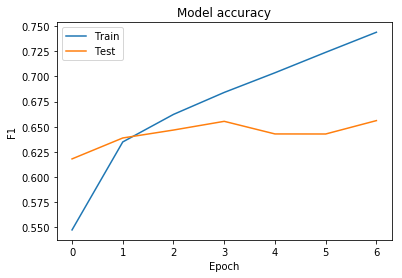

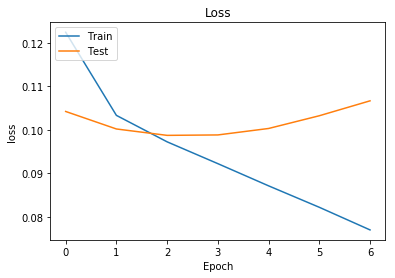

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Model accuracy')
plt.ylabel('F1')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
#after lemization
model_name = 'lstm_glove_emb'
checkpoint = ModelCheckpoint(filepath='./{}.hdf5'.format(model_name),
                             monitor='val_f1',mode='max',verbose=1,
                            save_best_only=True)

adamax= Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['acc',f1])
history  = model.fit(q_train,y_train,batch_size=1500,epochs=7,
                     validation_data=(q_val,y_val),verbose=1,callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 1175509 samples, validate on 130613 samples
Epoch 1/7
1175509/1175509 [==============================] - 253s 215us/step - loss: 0.1302 - acc: 0.9506 - f1: 0.5103 - val_loss: 0.1086 - val_acc: 0.9583 - val_f1: 0.6014

Epoch 00001: val_f1 improved from -inf to 0.60143, saving model to ./lstm_glove_emb.hdf5
Epoch 2/7
1175509/1175509 [==============================] - 252s 215us/step - loss: 0.1051 - acc: 0.9583 - f1: 0.6272 - val_loss: 0.1019 - val_acc: 0.9592 - val_f1: 0.6569

Epoch 00002: val_f1 improved from 0.60143 to 0.65689, saving model to ./lstm_glove_emb.hdf5
Epoch 3/7
1175509/1175509 [==============================] - 252s 215us/step - loss: 0.0986 - acc: 0.9606 - f1: 0.6551 - val_loss: 0.0981 - val_acc: 0.9612 - val_f1: 0.6451

Epoch 00003: val_f1 did not improve from 0.65689
Epoch 4/7
1175509/1175509 [==============================] - 253s 215us/step - loss: 0.0934 - acc: 0.9625 - f1: 0.6765 - val_loss: 0.0998 - val_acc

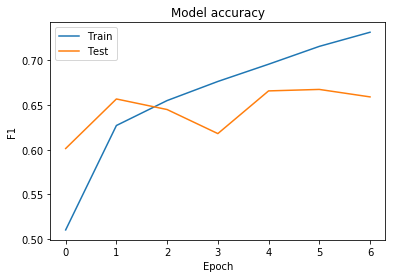

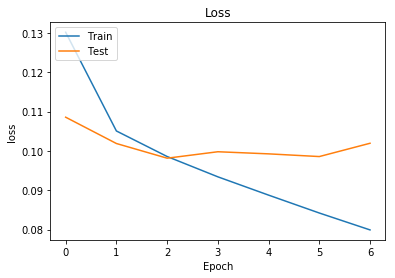

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Model accuracy')
plt.ylabel('F1')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
def get_model(max_len,n_words,emb_size,emb_matrix):
        inp = Input(shape=(max_len,))
        x = Embedding(input_dim=n_words,output_dim=emb_size, weights=[emb_matrix])(inp)
        x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
        x =  Bidirectional(CuDNNGRU(128,return_sequences=True))(x)
        x = Conv1D(50,10,activation='relu')(x)
        x = GlobalMaxPool1D()(x)
        #x = Conv1D(None,20,3,activation='relu')(x)
        #x = GlobalMaxPool1D()(x)
        x = Dense(128,activation='relu')(x)
        x = Dropout(0.5)(x)
        #X = BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, 
                               #beta_initializer='zeros', gamma_initializer='ones', 
                               #moving_mean_initializer='zeros', 
                               #moving_variance_initializer='ones',
                               #beta_regularizer=None, gamma_regularizer=None, 
                               #beta_constraint=None, gamma_constraint=None)(x)
        x = Dense(1, activation='sigmoid')(x)
        model = Model(inputs=inp,output=x)
        
        return model

In [29]:
model = get_model(max_len,n_words,emb_size,emb_matrix)
model.summary()
adamax= Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0001)
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['acc',f1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 300)          15000000  
_________________________________________________________________
bidirectional_5 (Bidirection (None, 100, 256)          440320    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 100, 256)          296448    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 91, 50)            128050    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               6528      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [30]:
model_name = 'lstm_glove_emb'
checkpoint = ModelCheckpoint(filepath='./{}.hdf5'.format(model_name),
                             monitor='val_f1',mode='max',verbose=1,
                            save_best_only=True)

history  = model.fit(q_train,y_train,batch_size=1500,epochs=8,
                     validation_data=(q_val,y_val),verbose=1,callbacks=[checkpoint])


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 1175509 samples, validate on 130613 samples
Epoch 1/8
1175509/1175509 [==============================] - 336s 286us/step - loss: 0.1219 - acc: 0.9524 - f1: 0.5499 - val_loss: 0.1050 - val_acc: 0.9584 - val_f1: 0.6326

Epoch 00001: val_f1 improved from -inf to 0.63260, saving model to ./lstm_glove_emb.hdf5
Epoch 2/8
1175509/1175509 [==============================] - 334s 284us/step - loss: 0.1040 - acc: 0.9588 - f1: 0.6333 - val_loss: 0.1025 - val_acc: 0.9600 - val_f1: 0.6054

Epoch 00002: val_f1 did not improve from 0.63260
Epoch 3/8
1175509/1175509 [==============================] - 334s 284us/step - loss: 0.0977 - acc: 0.9610 - f1: 0.6612 - val_loss: 0.0977 - val_acc: 0.9605 - val_f1: 0.6620

Epoch 00003: val_f1 improved from 0.63260 to 0.66198, saving model to ./lstm_glove_emb.hdf5
Epoch 4/8
1175509/1175509 [==============================] - 333s 283us/step - loss: 0.0924 - acc: 0.9629 - f1: 0.683

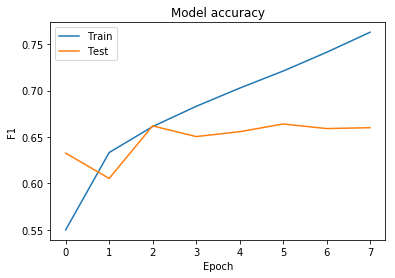

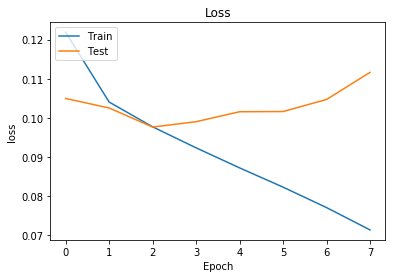

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Model accuracy')
plt.ylabel('F1')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()